# Facial Expression Recognition Using SVM


## Imports

In [11]:
import random
import glob
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils import to_categorical

## Data Read

In [12]:
train_path = ".../../Datasets/Emotion_Datasets/our_dataset/detected faces/train detected faces for each emotion/preprocessed/"

# Create a mapping from string train_labels (emotions) to class numbers
emotion_to_class = {'disgust': 0, 'anger': 1, 'happiness': 2}

# Initialize a set to store unique image labels
unique_labels = set()

# Initialize a list to store image data as tuples
train_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            if emotion_label == 'sadness':
                continue
            if emotion_label == 'surprise':
                continue
            if emotion_label == 'fear':
                continue
            if emotion_label == 'neutral':
                continue
            
            # print(emotion_label)
            
            
            
            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Store image and label as a tuple in the list
                train_image_data.append((image, class_number))
                
random.shuffle(train_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(train_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 77
Number of unique image labels: 3


In [13]:
test_path = "../../Datasets/Emotion_Datasets/our_dataset/detected faces/test detected faces for each emotion/preprocessed/"

# Initialize a list to store image data as tuples
test_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            # if emotion_label == 'sadness':
            #     emotion_label = 'anger'
            # if emotion_label == 'neutral':
            #     emotion_label = 'anger'
            # if emotion_label == 'disgust':
            #     emotion_label = 'anger'
            # if emotion_label == 'surprise':
            #     emotion_label = 'disgust'

            if emotion_label == 'sadness':
                continue
            if emotion_label == 'surprise':
                continue
            if emotion_label == 'fear':
                continue
            if emotion_label == 'neutral':
                continue

            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Store image and label as a tuple in the list
                test_image_data.append((image, class_number))
                
random.shuffle(test_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(test_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 30
Number of unique image labels: 3


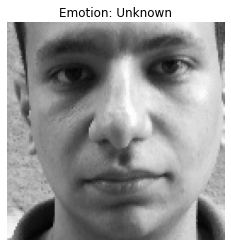

In [14]:
# Access an image and its corresponding emotion label
first_image, first_emotion = train_image_data[50]

# Display the image along with its emotion label
# emotion_map = {'anger': 1, 'disgust': 2, 'happiness': 3, 'sadness': 4, 'surprise': 5, 'neutral': 6, 'disgust': 7}
emotion_map = {'disgust': 0, 'anger': 1, 'happiness': 2}
emotion_label = emotion_map.get(first_emotion, 'Unknown')  # Get emotion label based on the mapped class number

# Plot the image with the emotion label as the title
plt.imshow(first_image)
plt.title(f"Emotion: {emotion_label}")
plt.axis('off')  # Turn off axis labels
plt.show()

## SVM Model

In [15]:
X_train = np.array([data[0] for data in train_image_data])
train_labels = np.array([data[1] for data in train_image_data])
# Check unique labels and label encoding
unique_labels_adjusted = set(train_labels)
print("Unique Labels:", unique_labels_adjusted)
y_train = to_categorical(train_labels, num_classes=3)

X_test = np.array([data[0] for data in test_image_data])
test_labels = np.array([data[1] for data in test_image_data])
y_test = to_categorical(test_labels, num_classes=3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

le = LabelEncoder()
y_train = le.fit_transform(y_train.argmax(axis=1))
y_test = le.transform(y_test.argmax(axis=1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# print(f"X_Train = {X_train}")
# print(f"Y_Train = {y_train}")
# print(f"X_Test = {X_test}")
# print(f"Y_Test = {y_test}")

Unique Labels: {0, 1, 2}
(77, 128, 128, 3)
(30, 128, 128, 3)
(77, 3)
(30, 3)
(77, 49152)
(30, 49152)
(77,)
(30,)


In [16]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(f"Prediction: {y_pred}")

Prediction: [0 1 0 1 2 1 0 0 1 2 1 1 1 1 2 2 0 1 1 1 2 1 1 2 0 0 2 0 1 1]


## Results

In [17]:
# Step 4: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Confusion Matrix:
[[5 4 1]
 [1 9 0]
 [2 2 6]]

Accuracy: 0.67
Precision: 0.69
Recall: 0.67
F1 Score: 0.66


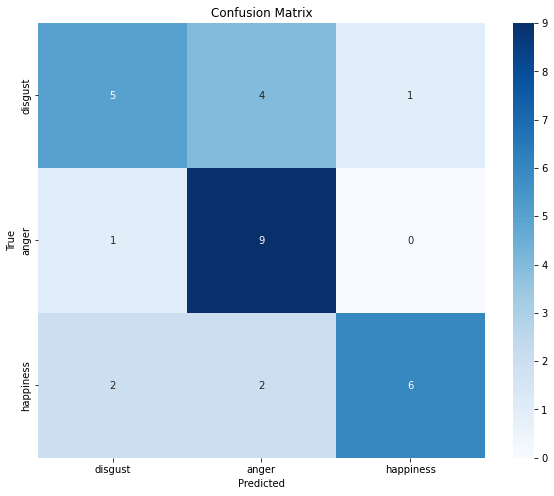

In [18]:
# Create a mapping from string labels (emotions) to class numbers
emotion_to_class = {'disgust': 0, 'anger': 1, 'happiness': 2}

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_to_class.keys(), yticklabels=emotion_to_class.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Validation

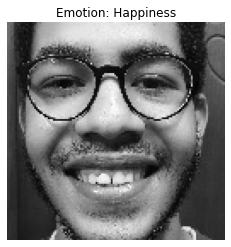

Input Data Shape: (1, 49152)
Class Probabilities: [[0.14757358 0.0595172  0.79290922]]
2
Predicted Emotion: happiness


In [25]:
# Load and preprocess a new image for testing
val_image_path = '../../Datasets/Emotion_Datasets/our_dataset/detected faces/validation detected faces for each emotion/preprocessed/happiness/497226.jpg_face.jpg'  # Replace with the path to your test image

# Read the image
val_image = cv2.imread(val_image_path)

# Plot the image
plt.imshow(cv2.cvtColor(val_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Emotion: Happiness")
plt.axis('off')  # Turn off axis labels
plt.show()

val_data = np.array(val_image)

# Expand dimensions to match the model's expected input shape (add batch dimension)
val_data = np.expand_dims(val_data, axis=0)

val_data = val_data.reshape(val_data.shape[0],-1)

# Print the shape of the input data
print("Input Data Shape:", val_data.shape)

# Make predictions
# predictions = clf.predict(val_data)
# Convert predictions to class labels
# predicted_class = np.argmax(predictions)

# Make probability predictions
class_probabilities = clf.predict_proba(val_data)

# Print class probabilities
print("Class Probabilities:", class_probabilities)

# Get the predicted class for each sample
predicted_class = np.argmax(class_probabilities, axis=1).item()

print(predicted_class)

# Map the predicted class index to the corresponding emotion label
emotion_labels = {0: 'disgust', 1: 'anger', 2: 'happiness'}
predicted_emotion = emotion_labels[predicted_class]

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')

